In [19]:
%load_ext autoreload
%autoreload 2
from IPython.display import display

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import logging
logging.basicConfig(
    format="%(asctime)s - %(levelname)s - %(message)s", level=logging.INFO, force=True
)

In [21]:
from flair.embeddings import TransformerWordEmbeddings

model_name = "bert-base-uncased"

params = {
    'model': model_name,
    'use_context': False,
    'layers':'all',
    'layer_mean':True,
    'subtoken_pooling':'mean'
}

embedding = TransformerWordEmbeddings(**params)

In [22]:
import utils, evaluators
ev = evaluators.FlairEvaluator(embedding, model_name)
ev.load_dataset("../datasets/dataset_1.json")

In [23]:
ev.reset_evaluator()
evaluation = ev.evaluate()

'OOV:'

,Case ID,Keyword,Word,Classification,Similarity,Lost,OOV


'Lost:'

,Case ID,Keyword,Word,Classification,Similarity,Lost,OOV
1477,4,when,"(now, 0)",1,NaN,True,False
1478,4,when,"(now, 1)",1,NaN,True,False


'Statistics:'

,Threshold,Precision,Recall,F1 Score,Accuracy,AUC-PR
Methods,,,,,,
bert-base-uncased-cos,0.302553,0.728571,0.6,0.658065,0.96574,0.594889


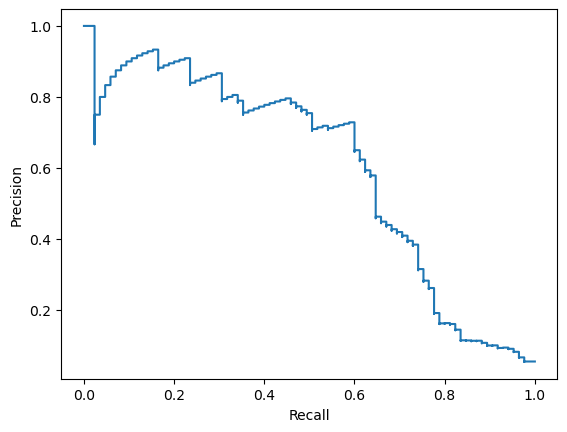

In [24]:
st = utils.Statistics(ev)

display("OOV:")
display(st.get_oov())

display("Lost:")
display(st.get_lost())

stats = st.calculate_statistics()
display("Statistics:")
display(stats)

st.display_PRC()

,Threshold,Precision,Recall,F1 Score,Accuracy,AUC-PR
Methods,,,,,,
bert-base-uncased-cos,0.302553,0.728571,0.600000,0.658065,0.965740,0.594889
bert-base-uncased-dot,83.474167,0.695652,0.564706,0.623377,0.962508,0.563157
bert-base-uncased-euc,5.452837,0.506667,0.447059,0.475000,0.945701,0.478238


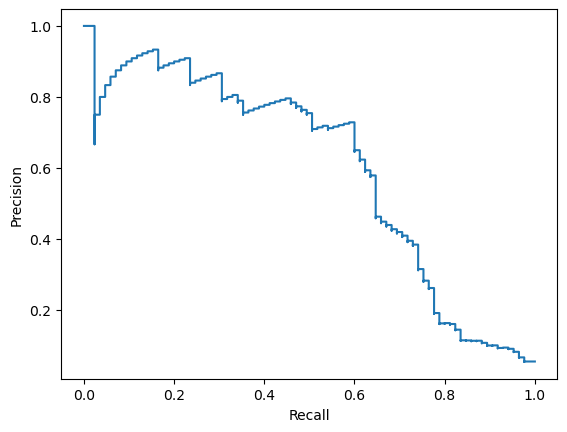

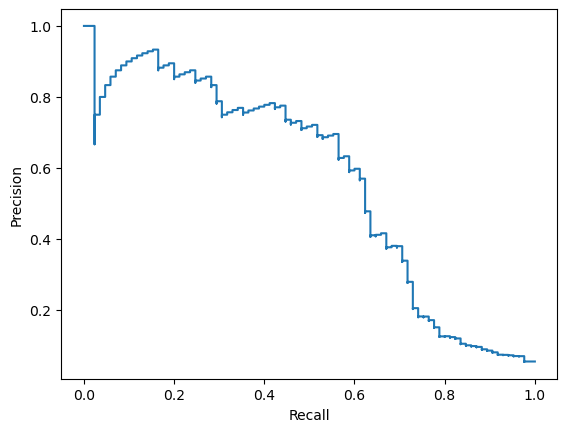

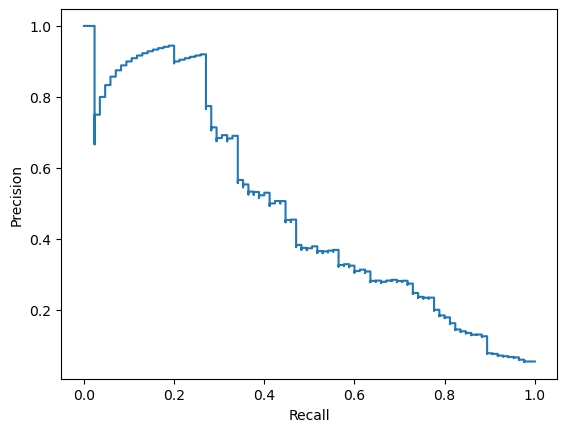

In [25]:
import pandas as pd
methods = [member for member in utils.SimilarityFunction]

results = pd.DataFrame()

for method in methods:
    ev.similarity_method = method
    ev.reset_evaluator()
    data = ev.evaluate()
    st = utils.Statistics(ev)
    stats = st.calculate_statistics()
    st.display_PRC()
    results = pd.concat([results, stats])

display(results)